In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
novaretail=pd.read_csv("sales_transactions.csv")
novaretail

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [4]:
novaretail.dtypes

TransactionID    object
Date             object
City             object
CustomerID       object
CustomerType     object
Category         object
UnitsSold         int64
UnitPrice         int64
Revenue           int64
Discount          int64
SalesRep         object
dtype: object

In [5]:
novaretail["Date"].astype("datetime64[ns]")

0     2024-01-15
1     2024-01-18
2     2024-01-20
3     2024-01-21
4     2024-02-01
         ...    
105   2024-03-05
106   2024-10-23
107   2024-09-08
108   2024-02-10
109   2024-11-08
Name: Date, Length: 110, dtype: datetime64[ns]

In [6]:
novaretail["Date"]=novaretail["Date"].astype("datetime64[ns]")

In [7]:
#1. what is the total revenue generated in the dataset
novaretail["Revenue"].sum()

np.int64(29521000)

In [8]:
#2. How many total transactions were recorded?
novaretail["TransactionID"].nunique()

110

In [10]:
# answer for no 2 you can also use
len(novaretail["TransactionID"])

110

In [11]:
#3. How many distinct customers made purchases?
novaretail["CustomerID"].nunique()

77

In [12]:
#4. What is the total revenue generated from Lagos alone?
novaretail[novaretail["City"]=='Lagos'] ['Revenue'].sum()

np.int64(9285500)

In [46]:
#5. How many units of "Accessories" were sold in Abuja?
novaretail[(novaretail['City'] == 'Abuja') & (novaretail['Category'] == 'Accessories')]['UnitsSold'].count()
# i made a correction here (i changed my function from sum to counts after going through the question)

np.int64(7)

In [14]:
#6. What is the average discount offered across all transactions?
novaretail['Discount'].mean()

np.float64(3248.181818181818)

In [15]:
#7. What was the revenue for February 2024?
novaretail['Date'] = pd.to_datetime(novaretail['Date'])
february_2024_revenue = novaretail[(novaretail['Date'].dt.month == 2) & (novaretail['Date'].dt.year == 2024)]['Revenue'].sum()

In [16]:
february_2024_revenue

np.int64(3855000)

In [17]:
#8. Which month had the highest sales revenue?
monthly_revenue = novaretail.groupby(novaretail["Date"].dt.strftime("%Y-%m"))["Revenue"].sum().reset_index()
top_month_row = monthly_revenue.loc[monthly_revenue["Revenue"].idxmax()]
top_month, top_month_revenue = top_month_row["Date"], top_month_row["Revenue"]


In [18]:
top_month, top_month_revenue

('2024-09', np.int64(4744500))

In [19]:
# 9. Create a measure to calculate monthly revenue trend
monthly_revenue_trend = monthly_revenue.copy()
monthly_revenue_trend
# Already created above

,Date,Revenue
0,2024-01,2943000
1,2024-02,3855000
2,2024-03,2184500
3,2024-04,1559500
4,2024-05,2484500
5,2024-06,1083000
6,2024-07,1340000
7,2024-08,552500
8,2024-09,4744500
9,2024-10,2739000


In [20]:
#10. What is the revenue split between New and Returning customers?
novaretail.groupby("CustomerType")["Revenue"].sum().reset_index()

,CustomerType,Revenue
0,New,12027000
1,Returning,17494000


In [21]:
#11. What is the average revenue per customer?
average_revenue_per_customer=novaretail.groupby('CustomerID')['Revenue'].mean().reset_index()
average_revenue_per_customer

,CustomerID,Revenue
0,C001,119000.0
1,C002,85000.0
2,C003,20000.0
3,C004,160000.0
4,C005,180000.0
...,...,...
72,C138,316000.0
73,C140,575000.0
74,C143,540000.0
75,C144,717000.0


In [22]:
#12. How many customers bought more than once?
customer_counts = novaretail["CustomerID"].value_counts()
customers_more_than_once = (customer_counts > 1).sum()
customers_more_than_once

np.int64(23)

In [23]:
#13. Which product category generated the most revenue?
category_revenue = novaretail.groupby("Category")["Revenue"].sum().reset_index()
top_category_row = category_revenue.loc[category_revenue["Revenue"].idxmax()]
top_category, top_category_revenue = top_category_row["Category"], top_category_row["Revenue"]
top_category_revenue

np.int64(19149000)

In [24]:
#14. What is the average revenue per unit for Electronics?
electronics = novaretail[novaretail["Category"] == "Electronics"]
avg_revenue_per_unit_electronics = electronics["Revenue"].sum() / electronics["UnitsSold"].sum()
avg_revenue_per_unit_electronics

np.float64(156959.0163934426)

In [25]:
#15. Which sales rep generated the highest total revenue?
top_sales_rep = novaretail.groupby("SalesRep")["Revenue"].sum().idxmax()
top_sales_rep

'Abdul Salim'

In [26]:
#16. Calculate total units sold by each sales rep.
units_by_sales_rep = novaretail.groupby("SalesRep")["UnitsSold"].sum()
units_by_sales_rep

SalesRep
Abdul Salim    134
Chuka Obasi    110
Mary Felix     113
Name: UnitsSold, dtype: int64

In [27]:
#17. Calculates revenue from Lagos only if the customer is "New". (New customers only)
lagos_new_revenue = novaretail[(novaretail["City"] == "Lagos") & (novaretail["CustomerType"] == "New")]["Revenue"].sum()
lagos_new_revenue

np.int64(2563000)

In [48]:
#18. Calculate the total revenue excluding transactions from Port Harcourt.
novaretail.loc[novaretail["City"]!= ("port harcourt"), "Revenue"].sum()

np.int64(29521000)

In [29]:
#19. Calculate average units sold per transaction.
novaretail.groupby('TransactionID')['UnitsSold'].mean().reset_index()

,TransactionID,UnitsSold
0,T001,2.0
1,T002,1.0
2,T003,4.0
3,T004,1.0
4,T005,2.0
...,...,...
105,T106,2.0
106,T107,2.0
107,T108,1.0
108,T109,2.0


In [30]:
#20. Calculate the total discount value across all sales. 
total_discount_value =novaretail["Discount"].sum()
total_discount_value

np.int64(357300)

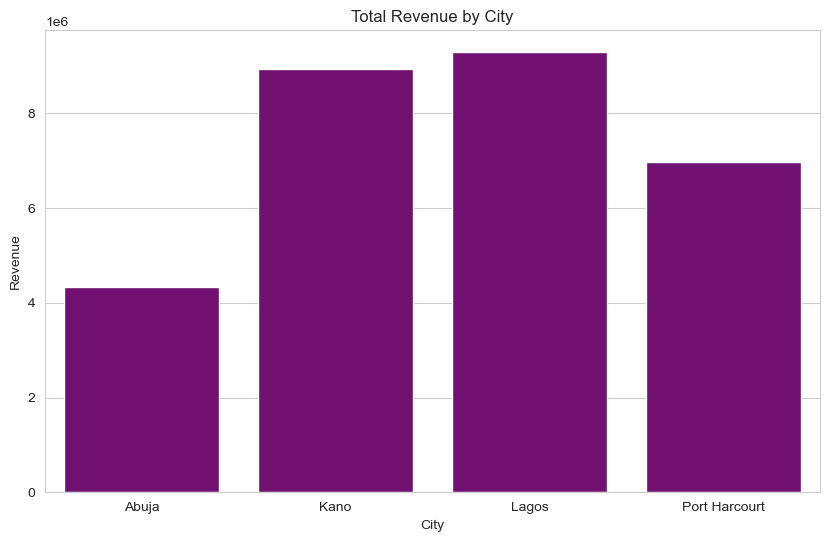

In [31]:
#visualization
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# 1. Total Revenue by City 
city_revenue = novaretail.groupby("City")["Revenue"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Revenue", color="purple", data=city_revenue)
plt.title("Total Revenue by City")
plt.show()

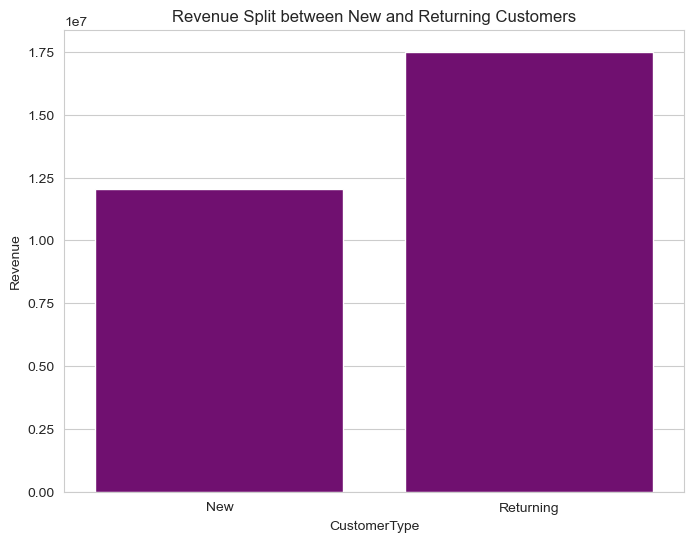

In [32]:
# 2. Revenue Split between New and Returning Customers
revenue_split_plot = novaretail.groupby("CustomerType")["Revenue"].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x="CustomerType", y="Revenue", color="purple", data=revenue_split_plot)
plt.title("Revenue Split between New and Returning Customers")
plt.show()

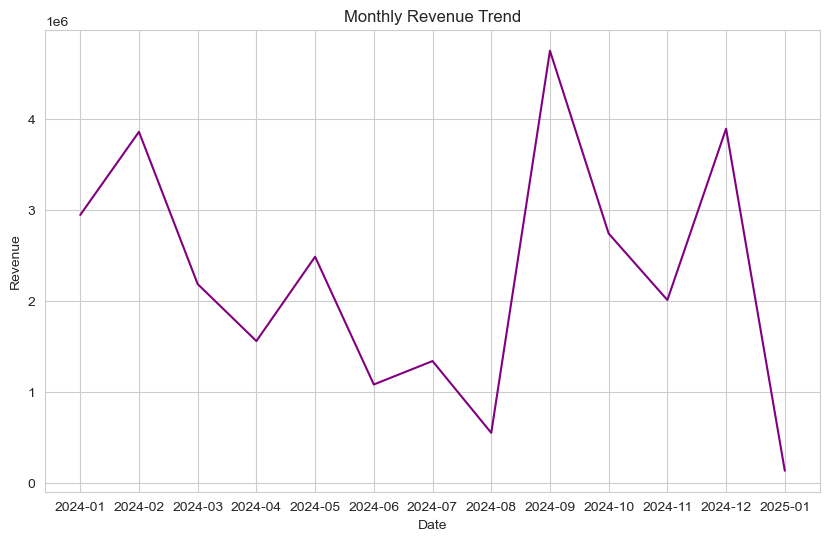

In [33]:
# 3. Monthly Revenue Trend
plt.figure(figsize=(10,6))
sns.lineplot(x="Date", y="Revenue", color="purple", data=monthly_revenue_trend)
plt.title("Monthly Revenue Trend")
plt.show()

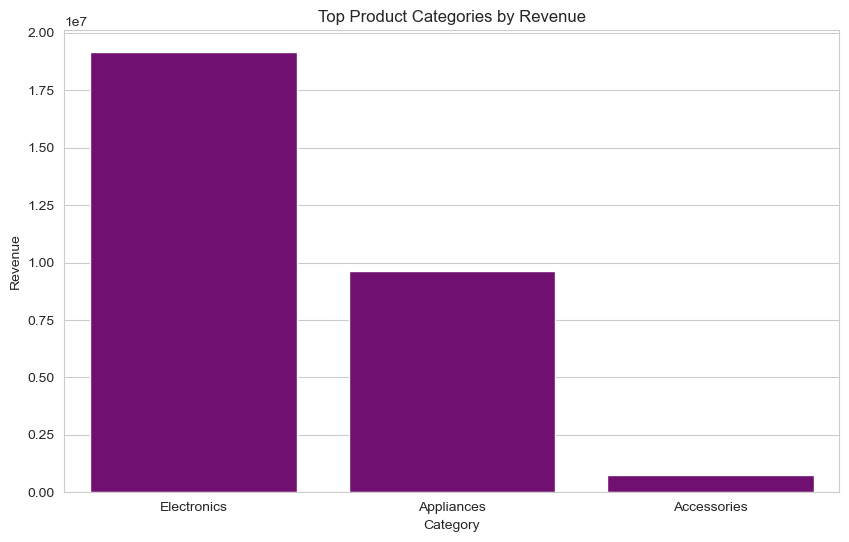

In [34]:
# 4. Top Product Categories by Revenue
top_categories = novaretail.groupby("Category")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x="Category", y="Revenue", color="purple", data=top_categories)
plt.title("Top Product Categories by Revenue")
plt.show()

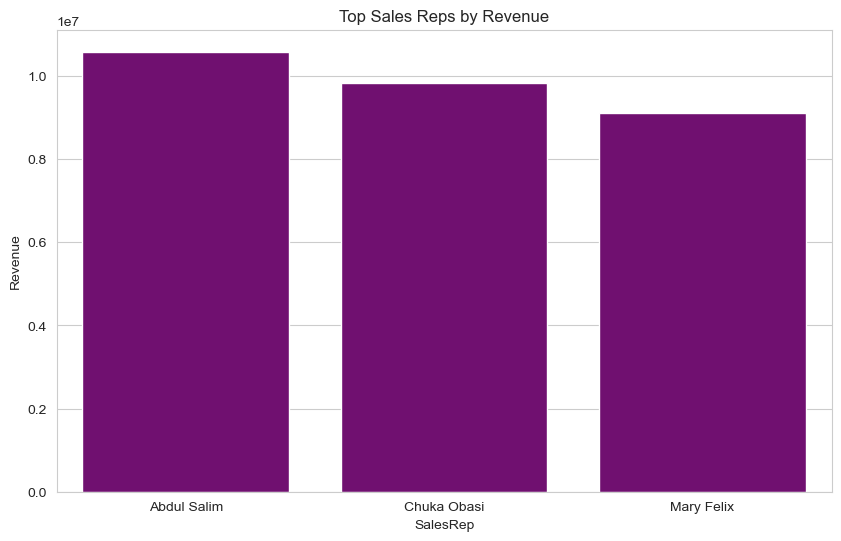

In [35]:
# 5. Sales Rep Performance
top_salesreps = novaretail.groupby("SalesRep")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x="SalesRep", y="Revenue", color="purple", data=top_salesreps)
plt.title("Top Sales Reps by Revenue")
plt.show()

Text(0.5, 1.0, 'Average Revenue per')

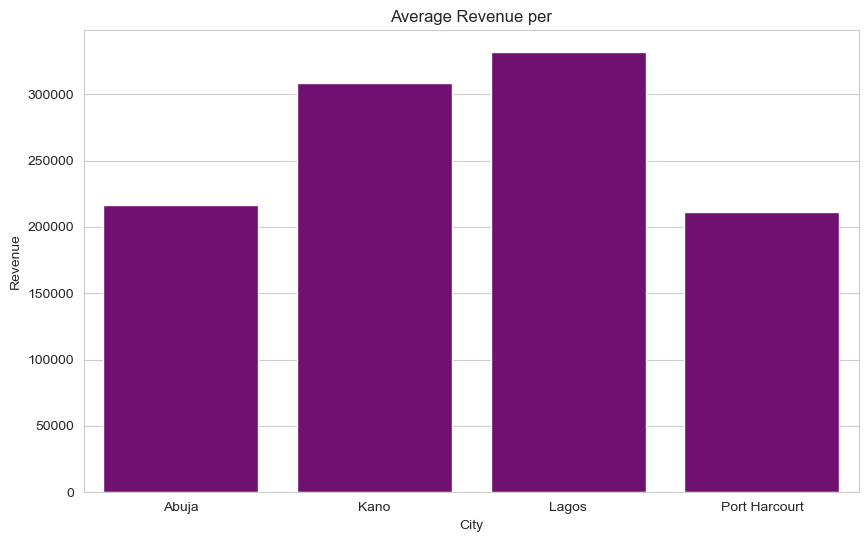

In [36]:
# 6. Average Revenue per Customer by City
avg_revenue_per_customer_city = novaretail.groupby("City")["Revenue"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Revenue", color="purple", data=avg_revenue_per_customer_city)
plt.title("Average Revenue per")

In [37]:
novaretail.isnull().sum()

TransactionID    0
Date             0
City             0
CustomerID       0
CustomerType     0
Category         0
UnitsSold        0
UnitPrice        0
Revenue          0
Discount         0
SalesRep         0
dtype: int64

In [42]:
revenue_split=novaretail.groupby("CustomerType")["Revenue"].sum().reset_index()

<Figure size 1000x800 with 0 Axes>

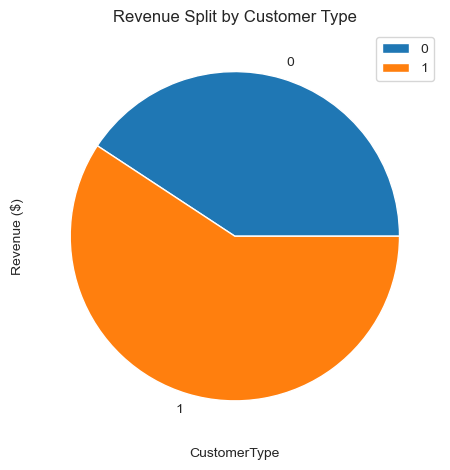

In [44]:
plt.figure(figsize=(10,8))
revenue_split.plot(kind='pie',x='CustomerType',y='Revenue',color=['purple','pink'])
plt.title('Revenue Split by Customer Type')
plt.xlabel('CustomerType')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()